In [3]:
#all imports are uphere
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [1]:
#connecting google drive with colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# getting the csv data in carData variable
carData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car_data.csv")

In [ ]:
# This dataset contains details of 1000 customers who intend to buy a car, considering their annual salaries.

# Columns:
# User ID
# Gender
# Age
# Annual Salary
# Purchase Decision (No = 0; Yes = 1)

In [5]:
# shows all data
carData

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [6]:
# removes UserID column, as it doesn't need in the visualization
carData.drop('User ID', axis=1 ,inplace=True)

In [ ]:
# show data without user ID
carData

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [ ]:
# get the info about the data, see if any null or empty values in the csv
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [ ]:
# as there is no null values we can start our work
# describe the data table from a wide view
carData.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [7]:
# changing 0 to not purchased and 1 to purchased for better understanding
carData["Purchased"] = carData["Purchased"].replace({0: "Not Purchased", 1: "Purchased"})
carData

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,Not Purchased
1,Male,40,43500,Not Purchased
2,Male,49,74000,Not Purchased
3,Male,40,107500,Purchased
4,Male,25,79000,Not Purchased
...,...,...,...,...
995,Male,38,59000,Not Purchased
996,Female,47,23500,Not Purchased
997,Female,28,138500,Purchased
998,Female,48,134000,Purchased


In [ ]:
# see how man many purchased and not purchsed in the table
carData['Purchased'].value_counts()

,count
Purchased,
Not Purchased,598
Purchased,402


<Axes: ylabel='count'>

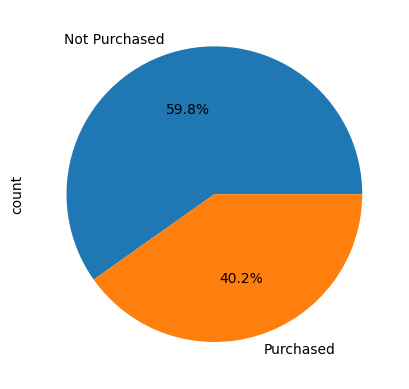

In [ ]:
# purchased values in a pie chart for better visual
carData["Purchased"].value_counts().plot(kind="pie", autopct="%1.1f%%")

<Axes: ylabel='count'>

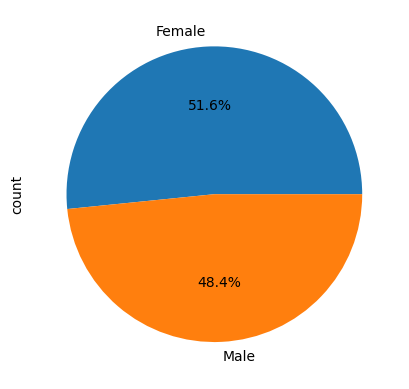

In [ ]:
# see how many male and female came for a query
carData["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%")

In [ ]:
# see how many of each gender bought a car
carData.groupby('Gender')['Purchased'].value_counts()

Gender  Purchased    
Female  Not Purchased    297
        Purchased        219
Male    Not Purchased    301
        Purchased        183
Name: count, dtype: int64

<Axes: ylabel='count'>

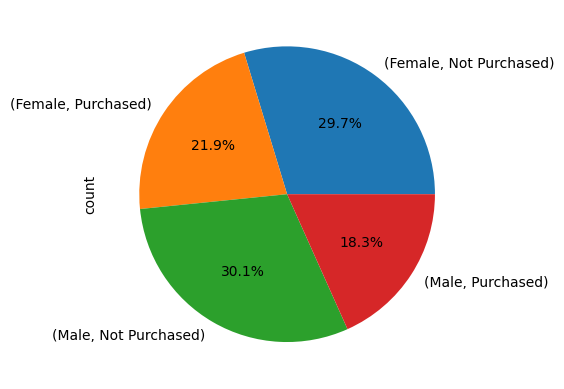

In [ ]:
# see how many of each gender bought a car in pie chart
carData.groupby('Gender')['Purchased'].value_counts().plot(kind="pie", autopct="%1.1f%%")

In [ ]:
# as female bought more car, we checked the salary of both gender
carData.groupby('Gender')['AnnualSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,516.0,74802.325581,36010.053537,15000.0,46375.0,72250.0,97750.0,151500.0
Male,484.0,70435.950413,32675.137738,15000.0,46250.0,71500.0,87500.0,152500.0


<Axes: ylabel='Frequency'>

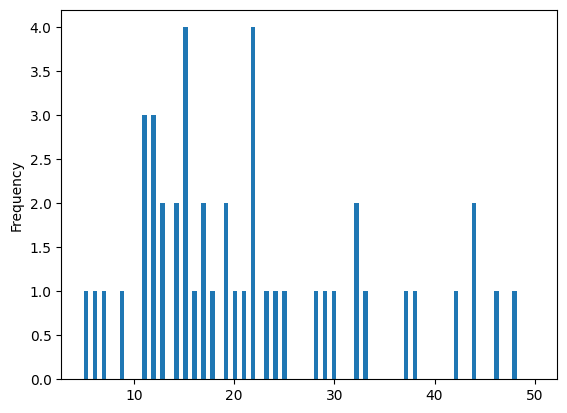

In [ ]:
# see car buyying rate in respect of age
carData["Age"].value_counts().plot(kind="hist",bins=100,range=(5, 50))

<Axes: ylabel='Frequency'>

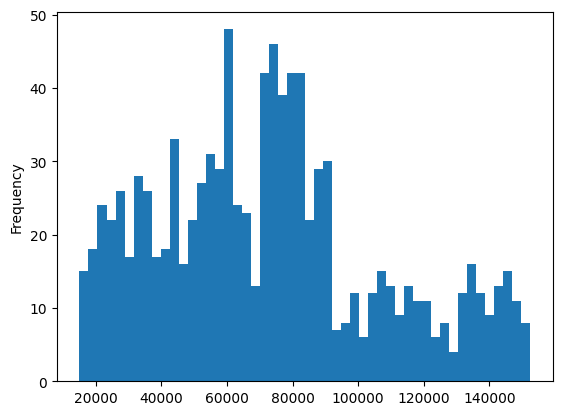

In [ ]:
# # see car buyying rate in respect of salary
carData["AnnualSalary"].plot(kind="hist",bins=50)

In [8]:
car_purchase = carData[carData['Purchased']== "Purchased"]
car_p = len(car_purchase[carData['AnnualSalary'] > carData['AnnualSalary'].mean()].value_counts())
print("Number of people above average annual salary who purchased car:", car_p)

Number of people above average annual salary who purchased car: 265


<ipython-input-8-9e1473919377>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  car_p = len(car_purchase[carData['AnnualSalary'] > carData['AnnualSalary'].mean()].value_counts())


In [9]:
car_p_belowAvarage = len(car_purchase[carData['AnnualSalary'] < carData['AnnualSalary'].mean()].value_counts())
print("Number of people above average annual salary who purchased car:", car_p_belowAvarage)

Number of people above average annual salary who purchased car: 127


<ipython-input-9-f5a032c419b1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  car_p_belowAvarage = len(car_purchase[carData['AnnualSalary'] < carData['AnnualSalary'].mean()].value_counts())


In [10]:
carDataMaleFemale = carData.copy()

In [ ]:
carDataMaleFemale

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,Not Purchased
1,Male,40,43500,Not Purchased
2,Male,49,74000,Not Purchased
3,Male,40,107500,Purchased
4,Male,25,79000,Not Purchased
...,...,...,...,...
995,Male,38,59000,Not Purchased
996,Female,47,23500,Not Purchased
997,Female,28,138500,Purchased
998,Female,48,134000,Purchased


In [11]:
# changing back to 1 and 2 to get co-relation
carDataMaleFemale["Purchased"] = carDataMaleFemale["Purchased"].replace({"Not Purchased": "0","Purchased": "1"})

In [ ]:
carDataMaleFemale

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


<Axes: >

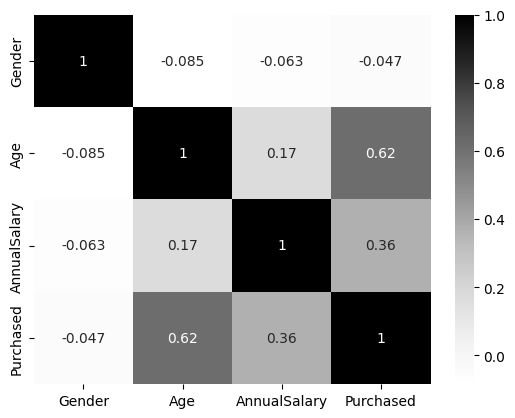

In [12]:
# Correlation
encoder = LabelEncoder()
# to check co-relation in the table we switched the male with 1 and female with 0 as a string to math value
carDataMaleFemale['Gender'] = encoder.fit_transform(carDataMaleFemale['Gender'])
sns.heatmap(carDataMaleFemale.corr(),annot=True, cmap='Grays')

In [13]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [14]:
# Encode the Gender column
le = LabelEncoder()
carData['Gender'] = le.fit_transform(carData['Gender'])

In [ ]:
carData

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


In [15]:
# Split into features (X) and target (y)
X = carData[['Gender', 'Age', 'AnnualSalary']]
y = carData['Purchased']

In [16]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X


array([[ 1.03252879, -0.47711966, -1.52849808],
       [ 1.03252879, -0.00990495, -0.84676745],
       [ 1.03252879,  0.83108153,  0.03803187],
       ...,
       [-0.968496  , -1.13122026,  1.90916486],
       [-0.968496  ,  0.73763859,  1.77862069],
       [-0.968496  ,  0.36386682,  0.02352696]])

In [ ]:
y

,Purchased
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,1
998,1


In [17]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Model 1: Logistic Regression
#C213075
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

In [ ]:
accuracy_log_reg

0.795

In [19]:
# Model 2: Decision Tree Classifier
# C213076
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [ ]:
accuracy_tree

0.9

In [20]:
# Build SVM model
# C213099
svm_model = SVC(kernel='linear', random_state=42)  # Using a linear kernel
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy:", accuracy)


SVM Model Accuracy: 0.805


In [22]:
# Build Random Forest Classifier
# C201090 - Saqlainur Rahman
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)

Random Forest Model Accuracy: 0.89
